### Requirements:

- runes [#] 
- tierlist [#]
- patch notes [#]
- random interesting lore in lol [#]
- broken champ [#]
- patch history [#]
- champ recommendations related to
- attribute []
- mood [#]


### Tinkering

- retrain on bye and hi 
- deploy on stream lit with idle timers
- condition with champ names

### Sample contents
    
        {
            "tag": "placeholder",
            "patterns": [
                "Lorem ipsum dolor sit amet",
                "Lorem ipsum dolor sit amet",
                "Lorem ipsum dolor sit amet",
                "Lorem ipsum dolor sit amet"
            ],
            "responses": [
                "Lorem ipsum dolor sit amet",
                "Lorem ipsum dolor sit amet",
                "Lorem ipsum dolor sit amet",
                "Lorem ipsum dolor sit amet"
            ]
        },

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

### Creating Dataframe with content

In [2]:
# Parsing throught he Json

contents = json.loads(open('content.json', encoding="utf8").read())

tags = []
patterns = []
responses = {}

for intent in contents['intents']:
    responses[intent['tag']] = intent['responses']
    for pats in intent['patterns']:
        tags.append(intent['tag'])
        patterns.append(pats)
        
# Creating a list containing champ names
champ_data = json.loads(open('champions.json', encoding="utf8").read())
champ_names = list(champ_data['data'].keys())

In [3]:
# Creating the Dataframe

data = pd.DataFrame({"inputs": patterns, "tags": tags})

# Removing punctuations

import string

data['inputs'] = data['inputs'].apply(lambda w:[words.lower() for words in w if words not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda w: ''.join(w))
data

,inputs,tags
0,hi,greetings
1,hey,greetings
2,how is it going,greetings
3,hello,greetings
4,how are you,greetings
5,is anyone there,greetings
6,garen runes,runes
7,anivia build,runes
8,evelynn runes,runes
9,corki build,runes


In [4]:
data.to_csv('data files/Train_data.csv')

### Tokenizing

In [5]:
# Tokenizing the inputs

tokenzier = Tokenizer(num_words=2000)
tokenzier.fit_on_texts(data['inputs'])
train = tokenzier.texts_to_sequences(data['inputs'])

# Appling Padding

x_train = pad_sequences(train)

# Encoding

labelEnc = LabelEncoder()
y_train = labelEnc.fit_transform(data['tags'])

# Setting the input shape

input_shape = x_train.shape[1]

In [6]:
# Defining Vocabulary 

vocabulary = len(tokenzier.word_index)
print("Unique word count:", vocabulary)
output_length = labelEnc.classes_.shape[0]
print("Final output classes:", output_length)



Unique word count: 86
Final output classes: 10


### Creating the Neural Network

In [7]:
# Defining the model

inp = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(inp)
x = LSTM(20,return_sequences=True)(x)
#x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(output_length, activation='softmax')(x)
model = Model(inp,x)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 embedding (Embedding)       (None, 7, 10)             870       
                                                                 
 lstm (LSTM)                 (None, 7, 20)             2480      
                                                                 
 flatten (Flatten)           (None, 140)               0         
                                                                 
 dense (Dense)               (None, 10)                1410      
                                                                 
Total params: 4,760
Trainable params: 4,760
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compiling the model and setting hyperparameters

opt = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)

model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ["sparse_categorical_accuracy"])

In [10]:
train = model.fit(x_train, y_train, batch_size= 20, epochs=200)

Epoch 1/200
3/3 [==============================] - 1s 2ms/step - loss: 2.3057 - sparse_categorical_accuracy: 0.0690
Epoch 2/200
3/3 [==============================] - 0s 3ms/step - loss: 2.2854 - sparse_categorical_accuracy: 0.1379
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 2.2607 - sparse_categorical_accuracy: 0.1724
Epoch 4/200
3/3 [==============================] - 0s 3ms/step - loss: 2.2195 - sparse_categorical_accuracy: 0.1897
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 2.1789 - sparse_categorical_accuracy: 0.1897
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 2.1058 - sparse_categorical_accuracy: 0.2069
Epoch 7/200
3/3 [==============================] - 0s 2ms/step - loss: 2.0101 - sparse_categorical_accuracy: 0.3276
Epoch 8/200
3/3 [==============================] - 0s 2ms/step - loss: 1.8834 - sparse_categorical_accuracy: 0.4655
Epoch 9/200
3/3 [==============================] - 0s 2ms/step - loss: 1

3/3 [==============================] - 0s 2ms/step - loss: 0.0140 - sparse_categorical_accuracy: 1.0000
Epoch 72/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0138 - sparse_categorical_accuracy: 1.0000
Epoch 73/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0135 - sparse_categorical_accuracy: 1.0000
Epoch 74/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0132 - sparse_categorical_accuracy: 1.0000
Epoch 75/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0129 - sparse_categorical_accuracy: 1.0000
Epoch 76/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0126 - sparse_categorical_accuracy: 1.0000
Epoch 77/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0124 - sparse_categorical_accuracy: 1.0000
Epoch 78/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0122 - sparse_categorical_accuracy: 1.0000
Epoch 79/200
3/3 [==============================] - 0s 2ms/step - loss: 0.012

3/3 [==============================] - 0s 2ms/step - loss: 0.0057 - sparse_categorical_accuracy: 1.0000
Epoch 141/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0057 - sparse_categorical_accuracy: 1.0000
Epoch 142/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0056 - sparse_categorical_accuracy: 1.0000
Epoch 143/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0056 - sparse_categorical_accuracy: 1.0000
Epoch 144/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0055 - sparse_categorical_accuracy: 1.0000
Epoch 145/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0055 - sparse_categorical_accuracy: 1.0000
Epoch 146/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0054 - sparse_categorical_accuracy: 1.0000
Epoch 147/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0054 - sparse_categorical_accuracy: 1.0000
Epoch 148/200
3/3 [==============================] - 0s 2ms/step - los

In [13]:
model.save_weights("data files/model_weights.h5")

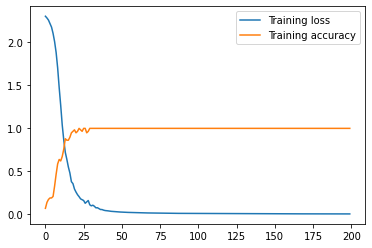

In [11]:
plt.plot(train.history['loss'], label = 'Training loss')
plt.plot(train.history['sparse_categorical_accuracy'], label = 'Training accuracy')
plt.legend()

### Checking the chatbot for deployment

In [12]:
import random

# Setting the URLs
build_url = "https://u.gg/lol/champions/{}/build"
tl_url = "https://u.gg/lol/tier-list"
patchhis_url = "https://leagueoflegends.fandom.com/wiki/{}/LoL/Patch_history"

ignore_terms = ["build", "runes", "patches", "patch", "history", "previous", "of", "rune"]


bot_name = "LOL Bot : "
print("Hi! I'm the LOL Chatbot")


def name_find(list1, list2):
    for i in list1: 
        if i not in list1 or i not in list2:
            name = i
    return name


while True:
    
    texts_pred = []
    input_text = input("You : ")
    

    
    # Preprocessing
    user_input = [wrd.lower() for wrd in input_text if wrd not in string.punctuation]
    user_input = ''.join(user_input)
    texts_pred.append(user_input)
    
    # Tokenizing and Padding
    user_input = tokenzier.texts_to_sequences(texts_pred)
    user_input = np.array(user_input).reshape(-1)
    user_input = pad_sequences([user_input],input_shape)
    
    # Prediction
    output = model.predict(user_input, verbose=0)
    output = output.argmax()
    
    # Assigning the right tag for the prediction
    response_tag = labelEnc.inverse_transform([output])[0]
    print(bot_name, random.choice(responses[response_tag]))
    
    
    # Conditions for posting links
    
    if response_tag == "runes":
        name = name_find(input_text.split(), ignore_terms)
        if name.capitalize() in champ_names:
            print(build_url.format(name))
        else:
            print(bot_name, "OOPS! Give me a valid champ name")
    
    if response_tag == "patchhistory":
        name = name_find(input_text.split(), ignore_terms)
        if name.capitalize() in champ_names:
            print(patchhis_url.format(name))
        else:
            print(bot_name, "OOPS! Give me a valid champ name")
         
    if response_tag == "broken":
        for i in responses[response_tag]:
            print(i)

    if response_tag == "goodbye":
        break

Hi! I'm the LOL Chatbot
You : teemo runes
LOL Bot :  GLHF.. Here's the build page.
https://u.gg/lol/champions/teemo/build
You : teemo patch history
LOL Bot :  The list of changes are here
https://leagueoflegends.fandom.com/wiki/teemo/LoL/Patch_history
You : karma runes
LOL Bot :  GLHF.. Here's the build page.
https://u.gg/lol/champions/karma/build
You : velkoz build
LOL Bot :  Quick here's the runes page
https://u.gg/lol/champions/velkoz/build
You : tier list 
LOL Bot :  Here's the tier list: https://u.gg/lol/tier-list
You : illaoi runes
LOL Bot :  GLHF.. Here's the build page.
https://u.gg/lol/champions/illaoi/build
You : sett runes
LOL Bot :  Quick here's the runes page
https://u.gg/lol/champions/sett/build
You : quit
LOL Bot :  Byee... To restart type Hi


### Saving the model

In [27]:
import pickle

#model.save("chatbot_model.h5")
pickle.dump(responses, open("data files/responses.pkl", 'wb'))
pickle.dump(champ_names, open("data files/champ_names.pkl", 'wb'))

In [12]:
with open('champions.json', 'r', encoding="utf8") as c:
    champs = json.load(c)
    
champ_names = list(champs["data"].keys())


build_url = "https://u.gg/lol/champions/{}/build"
tl_url = "https://u.gg/lol/tier-list"
patchhis_url = "https://leagueoflegends.fandom.com/wiki/{}/LoL/Patch_history"

build_url.format(champ_names[6])

'https://u.gg/lol/champions/Anivia/build'

In [13]:
champ_data = json.loads(open('champions.json', encoding="utf8").read())
champ_names = list(champ_data['data'].keys())

name.capitalize() in champ_names

True

In [14]:
name = "Teemo" 

name.capitalize() in champ_names

True

In [15]:
### Finding the champ name

queries  = ["Garen runes", "Anivia build", "Kaisa runes"]
terms = ["build", "runes"]

text = queries[1].split()

def name_find(list1, list2):
    for i in list1: 
        if i not in list1 or i not in list2:
            name = i
    return name

for j in queries:
    text = j.split()
    print(build_url.format(name_find(text,terms)))

https://u.gg/lol/champions/Garen/build
https://u.gg/lol/champions/Anivia/build
https://u.gg/lol/champions/Kaisa/build
